In [1]:
from init import *

In [2]:
b_longitudinal = 0.1
resonant_mw_freqs = [b_longitudinal * 0.7e6 * 2 * pi * k for k in range(-3, 3+1)]   # 7 transition frequencies
# mw_freq = resonant_mw_freqs[0]
decays = (
    natural_decay_ops_D1() + quenching_ops("D1") +
    F2_to_F1_ground_state_decay("D1", gamma=3000) +
    F1_to_F2_ground_state_decay("D1", gamma=3000) +
    dephasing_excited_states("D1")
    # + dephasing_ground_states_D1(gamma=3000)
)
laser_intensity = SATURATION_INTENSITY_D2_SIGMA_PM_CYCLING / 10
ham_laser = H_atom_field_D1(-1, E_0_plus(laser_intensity))
ham_mw = H_mw(5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[0], b_static_z=b_longitudinal)

rho_ss_laser = steadystate(ham_laser, c_op_list=decays)

In [3]:
ham_laser

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-2.68397359e+10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.23181328e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.23181328e+06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.68397359e+10  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.23181328e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.13356318e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.68397359e+10  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.01731398e+06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.61038415e+10
   0.00000000e+00  0.00000000e+00  0.00000000

In [4]:
ham_mw

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 4.41313225e+05   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          3.81422865e+03-3814.22864694j
   0.00000000e+00   +0.j         -1.55724809e+03-1557.24808591j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j        ]
 [ 0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
  -2.69701162e+03+2697.01161789j  0.00000000e+00   +0.j
   2.69717748e+03+2697.17747804j  0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000000e+00   +0.j
   0.00000000e+00   +0.j          0.00000

In [5]:
rabi_D1_vector_component(E_0_plus(laser_intensity))

8534252.718814742

## Time Evo due to Laser

10.1%. Run time:  12.45s. Est. time left: 00:00:01:50
20.1%. Run time:  21.63s. Est. time left: 00:00:01:26
30.1%. Run time:  29.13s. Est. time left: 00:00:01:07
40.1%. Run time:  35.62s. Est. time left: 00:00:00:53
50.0%. Run time:  40.29s. Est. time left: 00:00:00:40
60.0%. Run time:  44.86s. Est. time left: 00:00:00:29
70.0%. Run time:  49.59s. Est. time left: 00:00:00:21
80.0%. Run time:  54.20s. Est. time left: 00:00:00:13
90.0%. Run time:  58.77s. Est. time left: 00:00:00:06
Total run time:  63.97s


(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

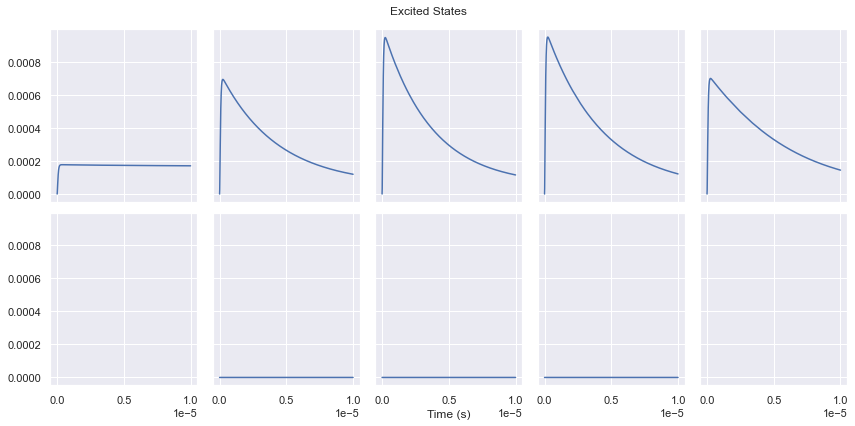

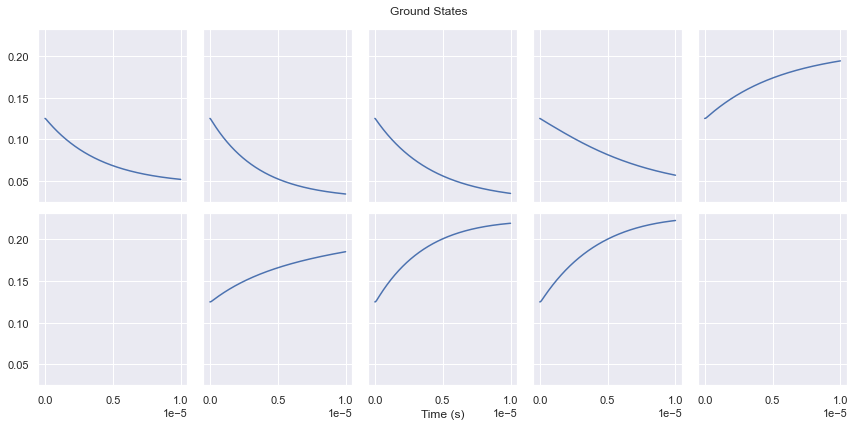

In [7]:
res_laser_decay = mesolve(ham_laser,
                          tlist=np.linspace(0, 1e-5, 1001),
                          rho0=get_equally_ground_state_D1(),
                          options=Options(nsteps=2**3 * 1000),
                          c_ops=decays,
                          progress_bar=True)
plot_excited_states_time(res_laser_decay)
plot_ground_states_time(res_laser_decay)


(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

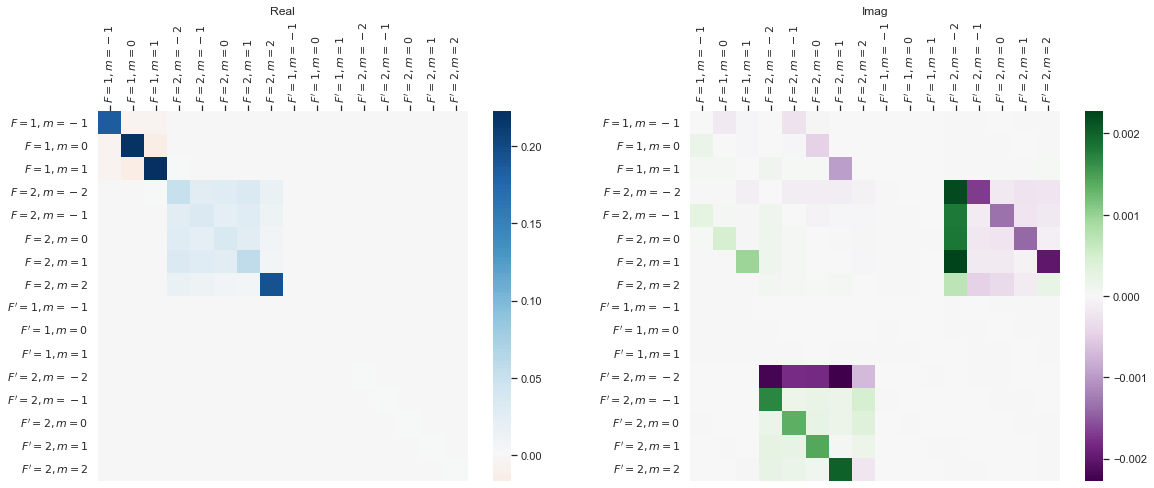

In [8]:
maplot(res_laser_decay.states[-1])


(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

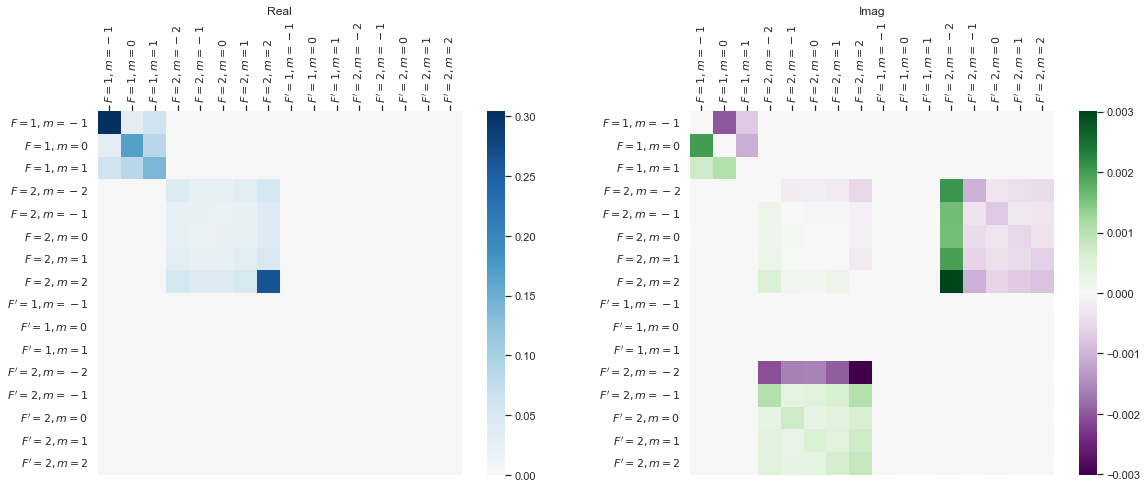

In [9]:
maplot(rho_ss_laser)

## Time Evo of resonant MW transitions without Decays

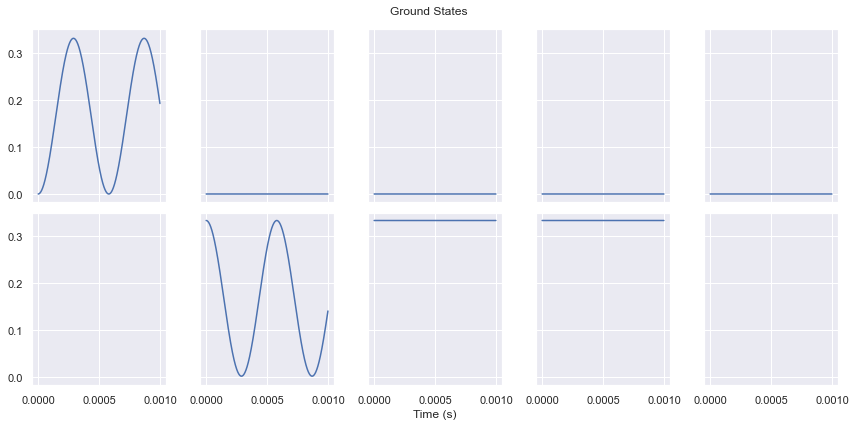

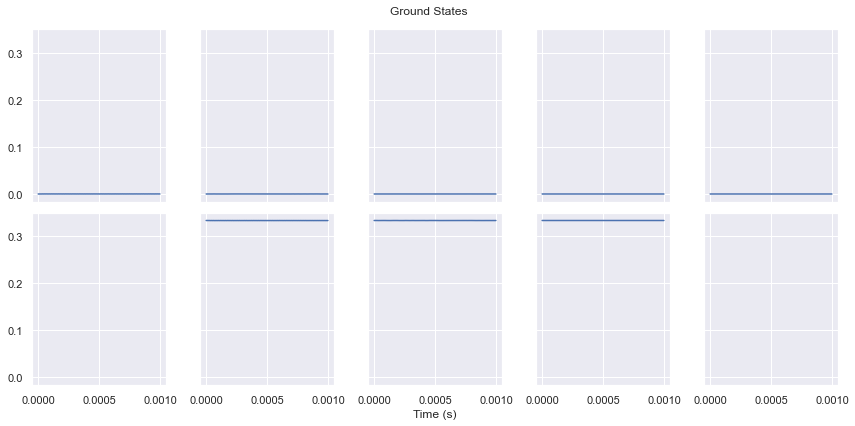

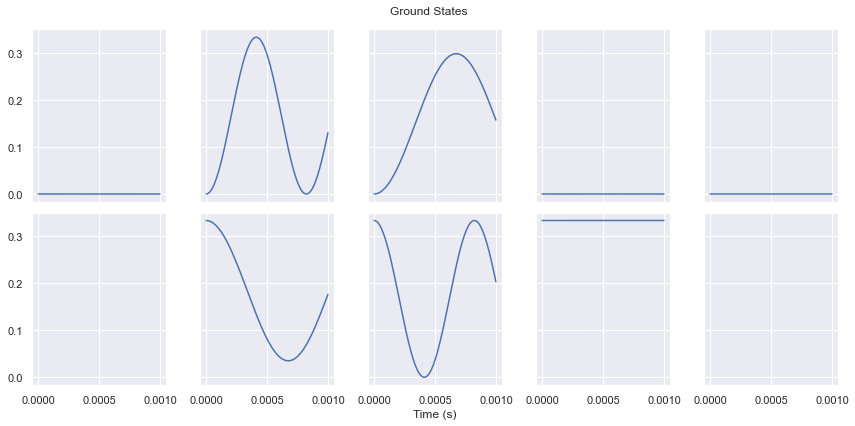

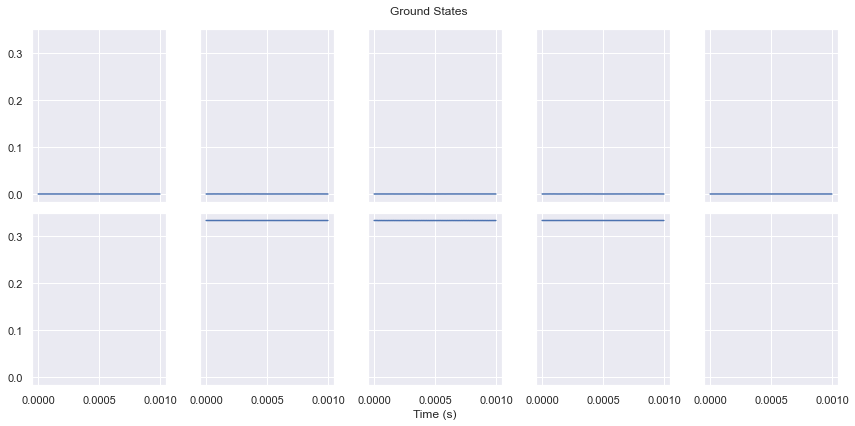

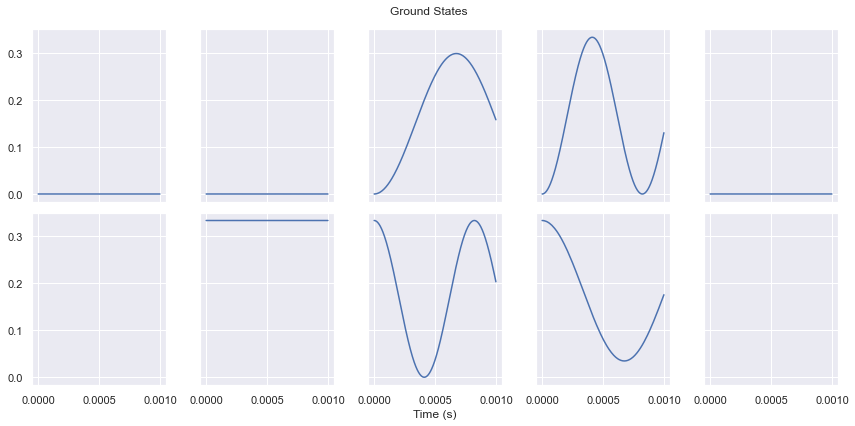

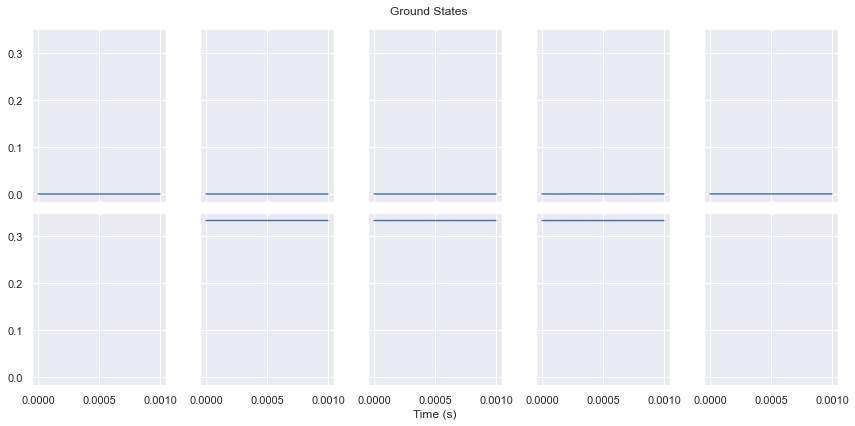

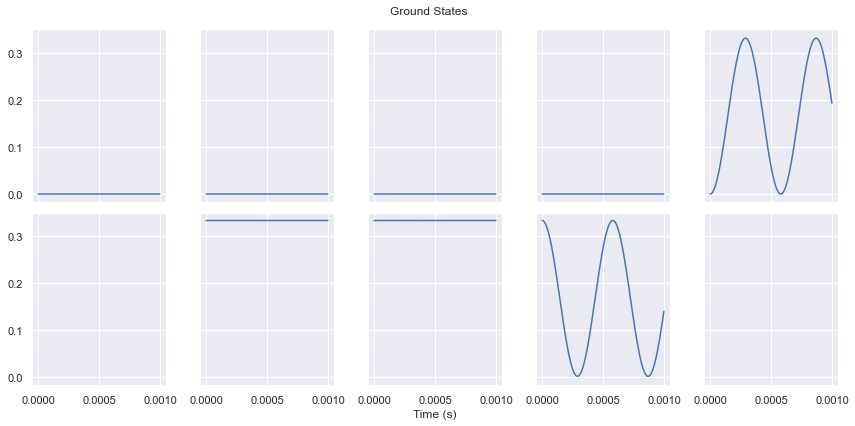

In [13]:
time_evo_res_all_transitions = []
for ind, freq in enumerate(resonant_mw_freqs):
    result = mesolve(H_mw(5e-4, 5e-4, 0, det_mw=freq, b_static_z=b_longitudinal),
                tlist=np.linspace(0, 1e-3, 1001),
                rho0=(get_ket_Fg_D1(1, -1).proj()+get_ket_Fg_D1(1, 0).proj()+get_ket_Fg_D1(1, 1).proj())/3,
                options=Options(nsteps=2**1 * 1000))
    plot_ground_states_time(result)
    time_evo_res_all_transitions.append(result)
    

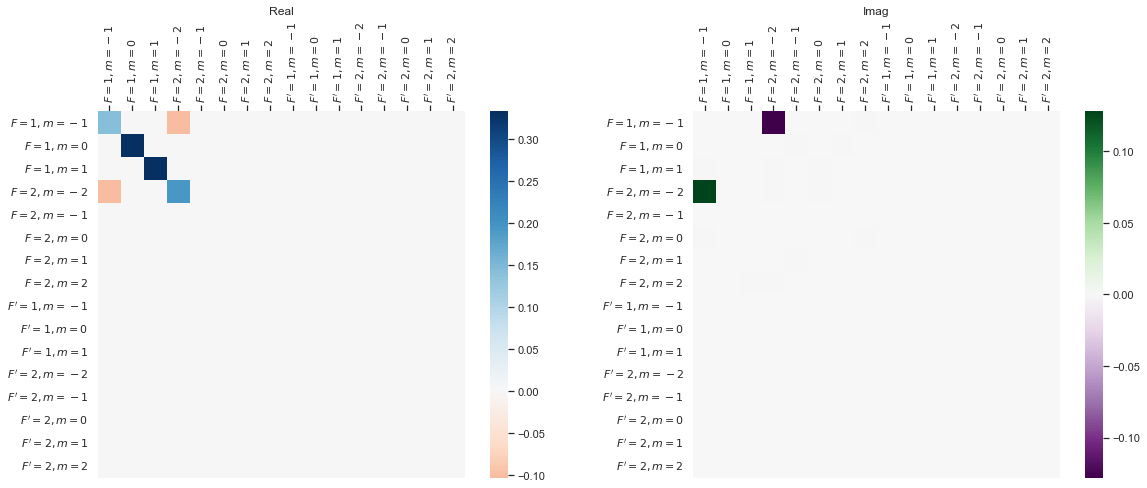

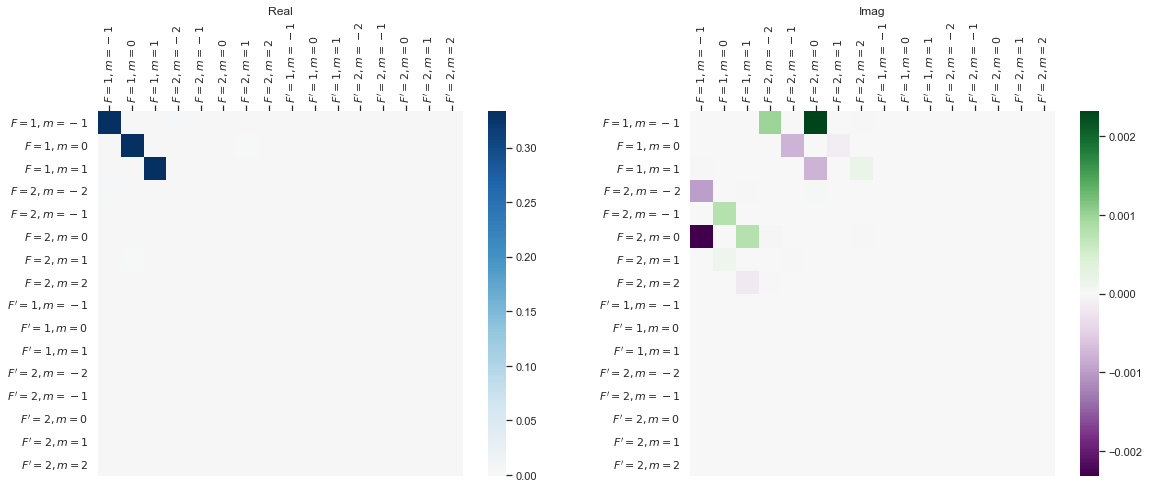

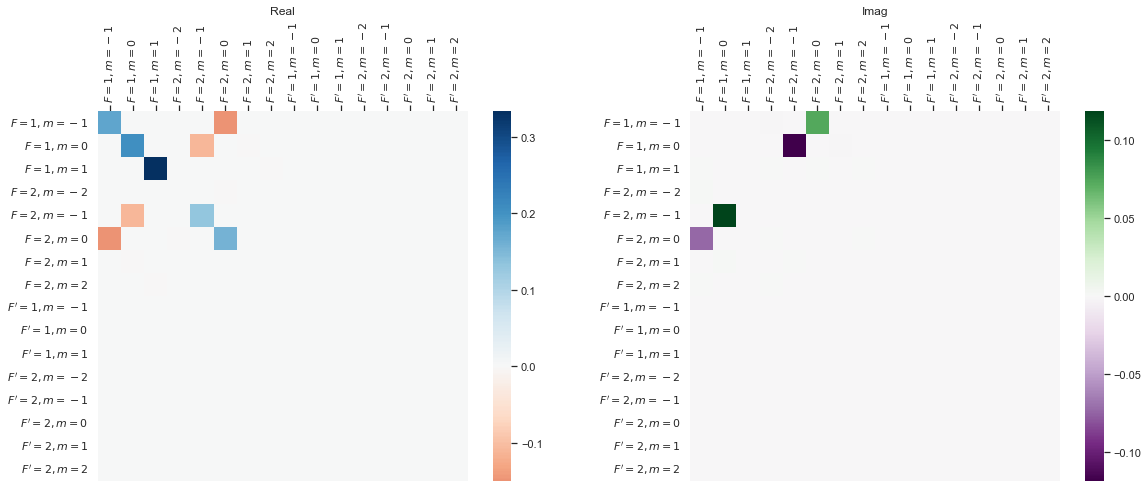

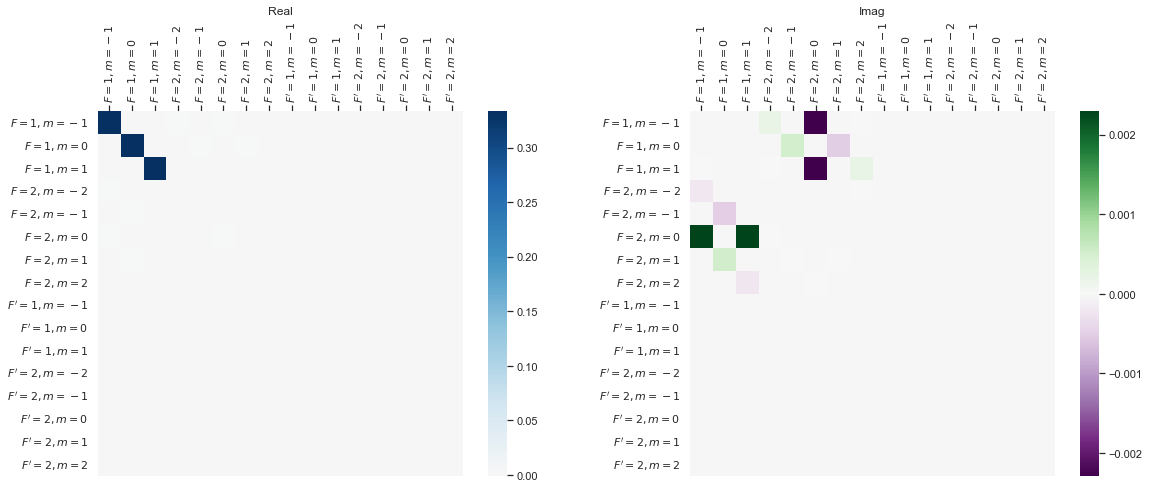

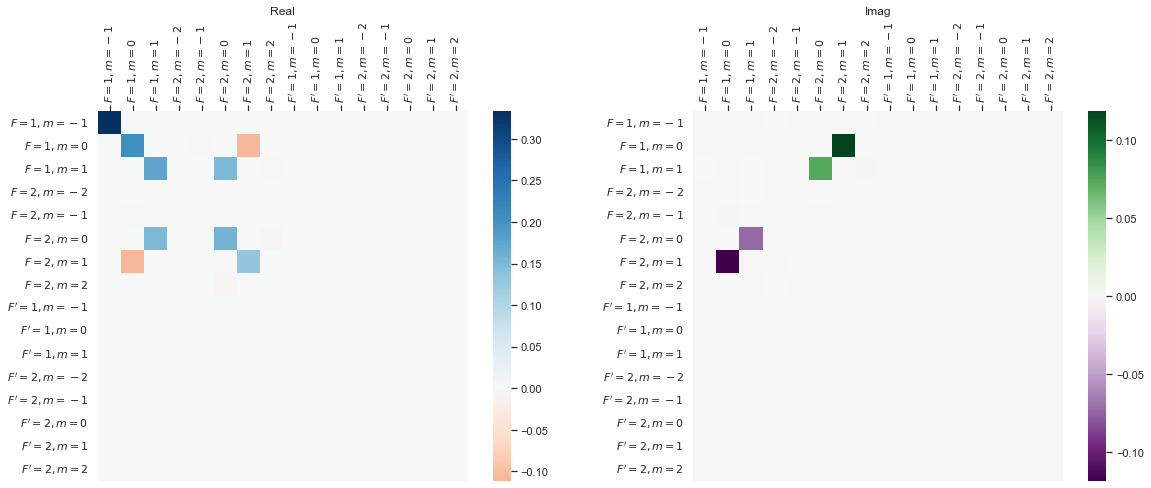

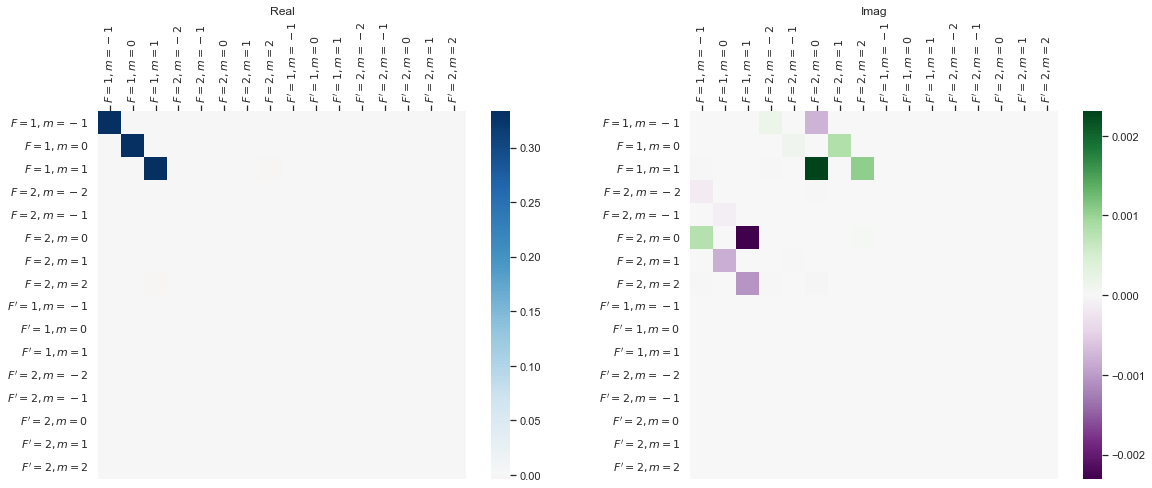

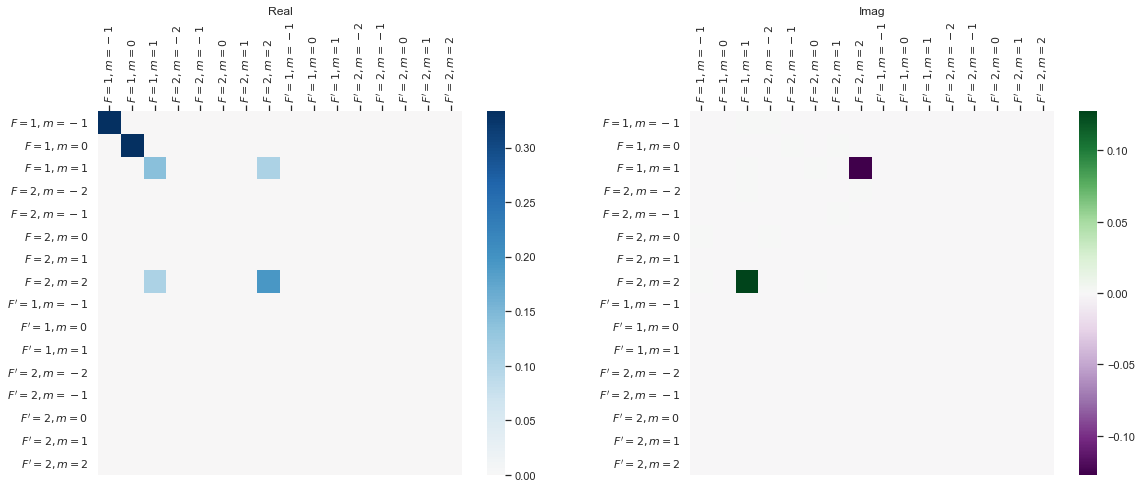

In [14]:
for elem in time_evo_res_all_transitions:
    maplot(elem.states[-1])

10.1%. Run time:   0.15s. Est. time left: 00:00:00:01
20.1%. Run time:   0.35s. Est. time left: 00:00:00:01
30.1%. Run time:   0.54s. Est. time left: 00:00:00:01
40.1%. Run time:   0.73s. Est. time left: 00:00:00:01
50.0%. Run time:   0.93s. Est. time left: 00:00:00:00
60.0%. Run time:   1.14s. Est. time left: 00:00:00:00
70.0%. Run time:   1.33s. Est. time left: 00:00:00:00
80.0%. Run time:   1.51s. Est. time left: 00:00:00:00
90.0%. Run time:   1.70s. Est. time left: 00:00:00:00
Total run time:   1.90s


(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

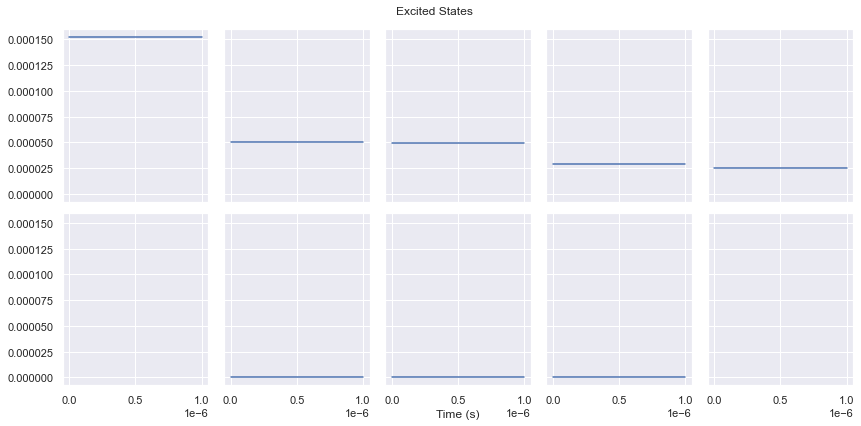

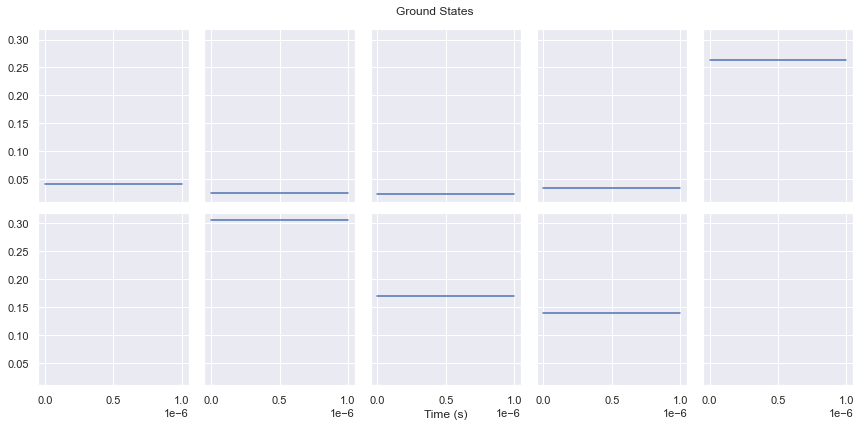

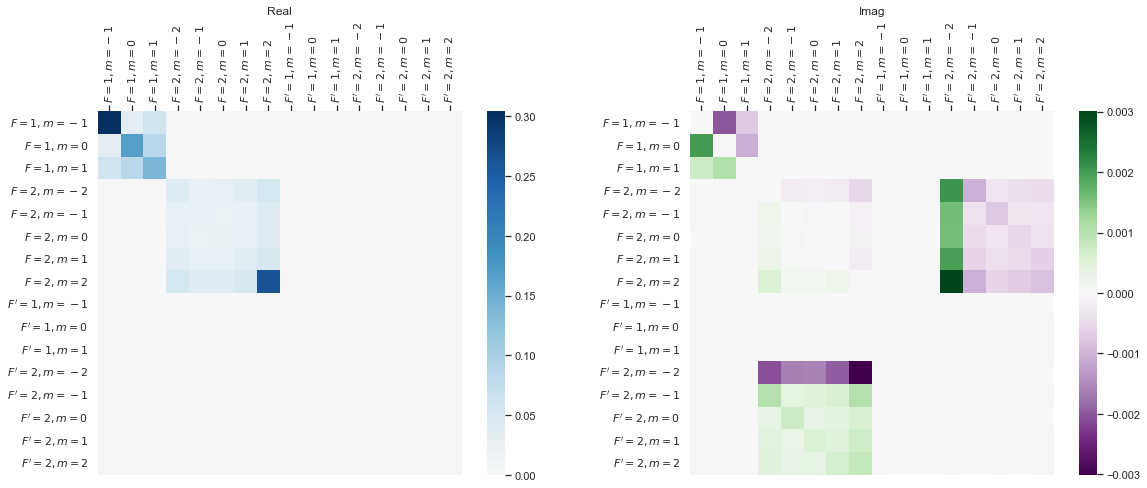

In [15]:
res_laser_decay1 = mesolve(ham_laser,
                          tlist=np.linspace(0, 1e-6, 1001),
                          rho0=rho_ss_laser,
                          options=Options(nsteps=2**1 * 1000),
                          c_ops=decays,
                          progress_bar=True)
plot_excited_states_time(res_laser_decay1)
plot_ground_states_time(res_laser_decay1)
maplot(res_laser_decay1.states[-1])

## MW Evo with Decay

### First MW transition

10.1%. Run time:   0.06s. Est. time left: 00:00:00:00
20.1%. Run time:   0.11s. Est. time left: 00:00:00:00
30.1%. Run time:   0.19s. Est. time left: 00:00:00:00
40.1%. Run time:   0.26s. Est. time left: 00:00:00:00
50.0%. Run time:   0.37s. Est. time left: 00:00:00:00
60.0%. Run time:   0.49s. Est. time left: 00:00:00:00
70.0%. Run time:   0.58s. Est. time left: 00:00:00:00
80.0%. Run time:   0.65s. Est. time left: 00:00:00:00
90.0%. Run time:   0.71s. Est. time left: 00:00:00:00
Total run time:   0.79s


(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

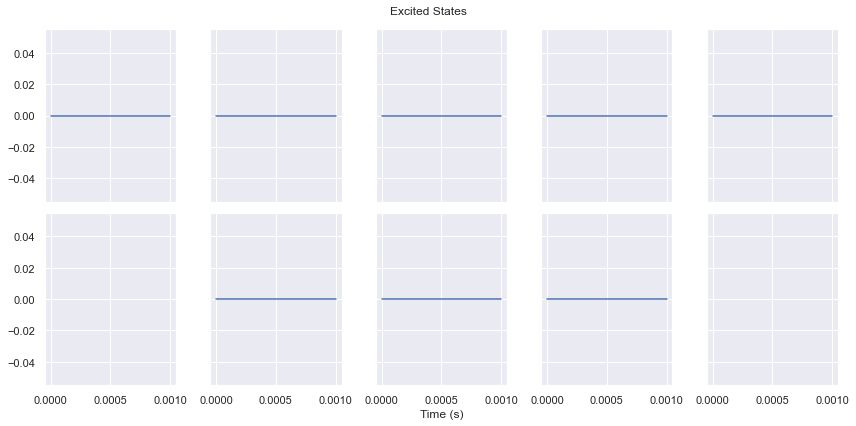

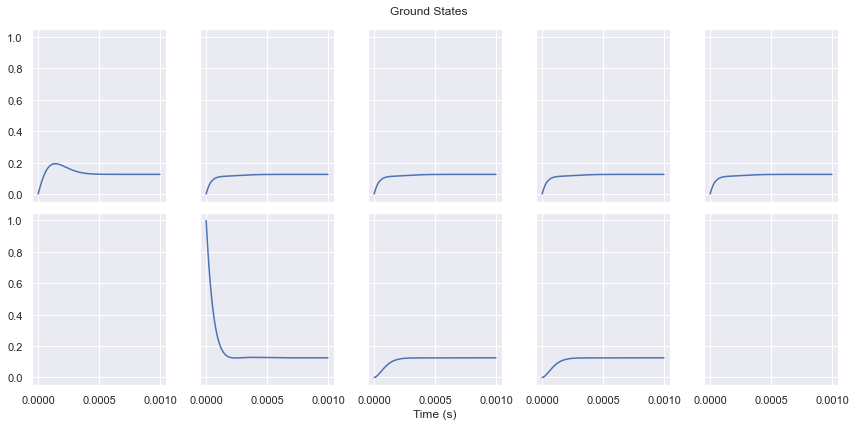

In [8]:
res_mw_decay_1 = mesolve(ham_mw,
                    tlist=np.linspace(0, 1e-3, 1001),
                    rho0=get_ket_Fg_D1(1, -1).proj(),
                    options=Options(nsteps=2**4 * 1000),
                    c_ops=decays,
                    progress_bar=True)
qsave(res_mw_decay_1, "res_mw_decay_1")
plot_excited_states_time(res_mw_decay_1)
plot_ground_states_time(res_mw_decay_1)


### Third MW transition ($\pi$)

10.1%. Run time:   0.03s. Est. time left: 00:00:00:00
20.1%. Run time:   0.06s. Est. time left: 00:00:00:00
30.1%. Run time:   0.09s. Est. time left: 00:00:00:00
40.1%. Run time:   0.11s. Est. time left: 00:00:00:00
50.0%. Run time:   0.13s. Est. time left: 00:00:00:00
60.0%. Run time:   0.16s. Est. time left: 00:00:00:00
70.0%. Run time:   0.18s. Est. time left: 00:00:00:00
80.0%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s


(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

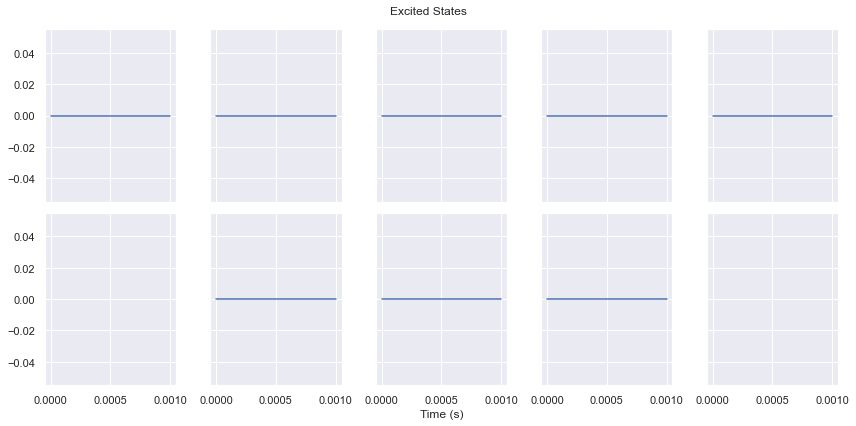

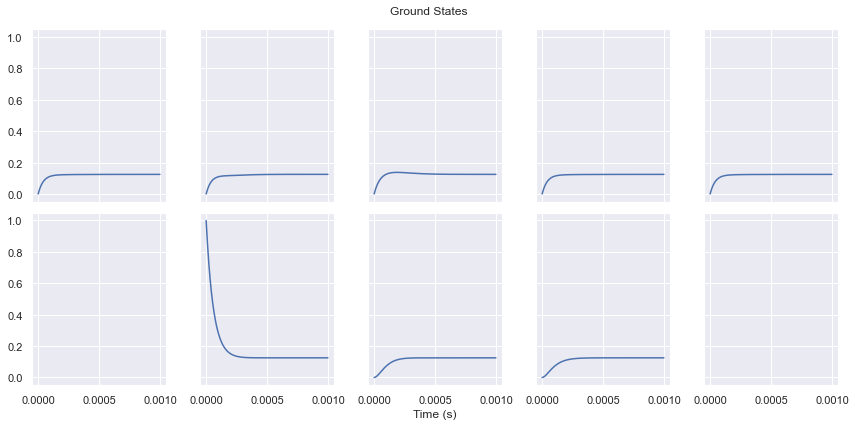

In [31]:
res_mw_decay_3 = mesolve(H_mw(
    5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[2], b_static_z=b_longitudinal),
                       tlist=np.linspace(0, 1e-3, 1001),
                                           rho0=get_ket_Fg_D1(1, -1).proj(),
                       options=Options(nsteps=2**3 * 1000),
                       c_ops=decays,
                       progress_bar=True)
qsave(res_mw_decay_3, "res_mw_decay_3")
plot_excited_states_time(res_mw_decay_3)
plot_ground_states_time(res_mw_decay_3)


(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

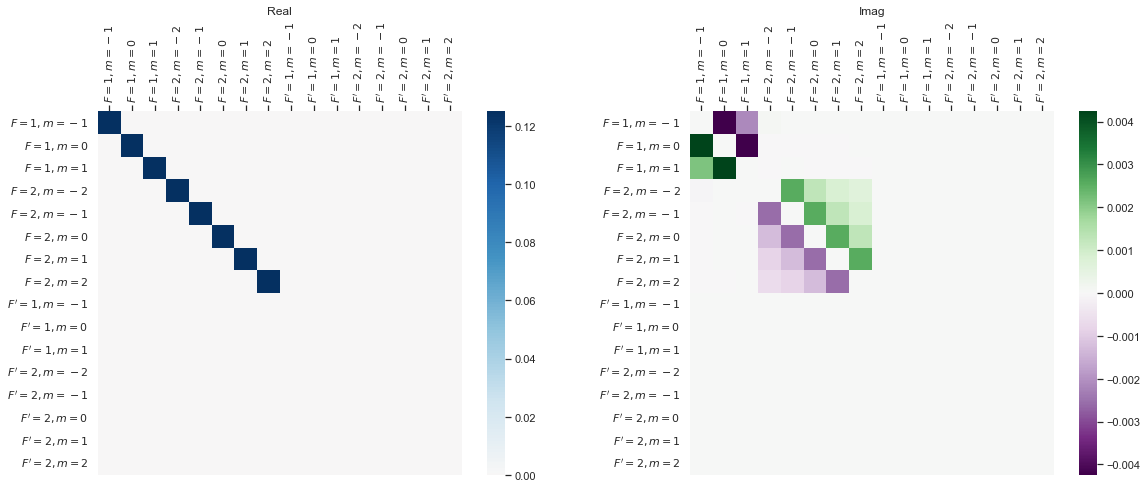

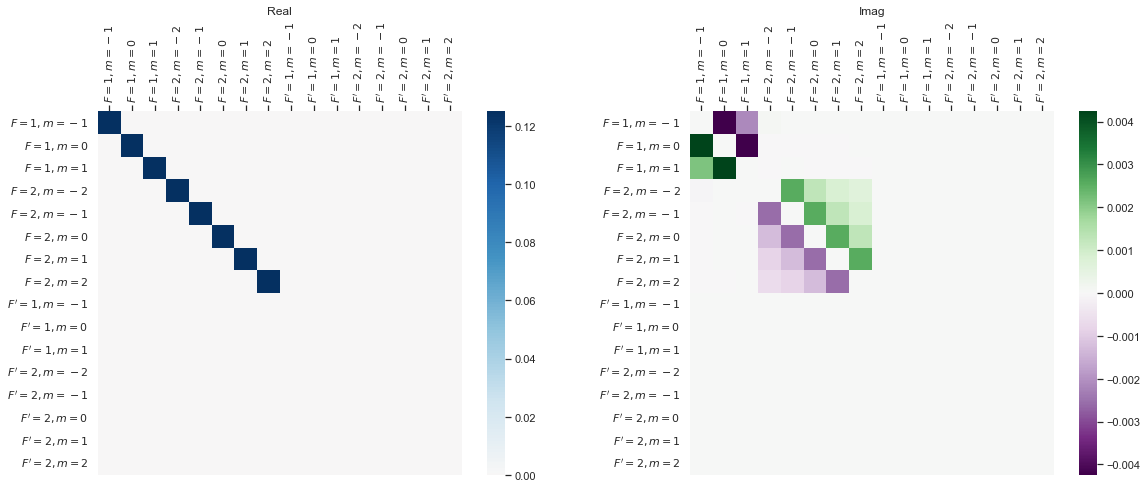

In [20]:
maplot(res_mw_decay.states[-1])
rho_ss_mw = steadystate(ham_mw, c_op_list=decays)
maplot(rho_ss_mw)

## Laser and MW Time Evo
### MW Transition 1

10.1%. Run time: 293.88s. Est. time left: 00:00:43:38
20.1%. Run time: 559.46s. Est. time left: 00:00:37:06
30.1%. Run time: 801.63s. Est. time left: 00:00:31:04
40.1%. Run time: 1047.06s. Est. time left: 00:00:26:06
50.0%. Run time: 1289.81s. Est. time left: 00:00:21:27
60.0%. Run time: 1533.80s. Est. time left: 00:00:17:00
70.0%. Run time: 1778.23s. Est. time left: 00:00:12:41
80.0%. Run time: 2022.23s. Est. time left: 00:00:08:24
90.0%. Run time: 2266.52s. Est. time left: 00:00:04:11
Total run time: 2510.56s


Text(0, 0.5, '$\\rho_{ee}$')

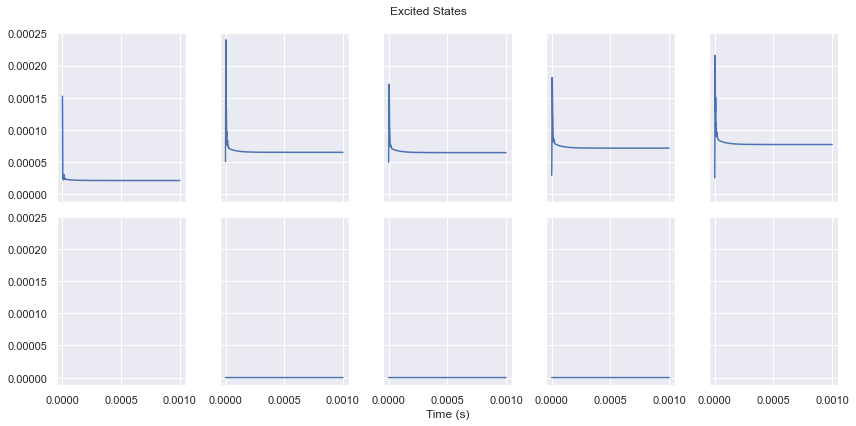

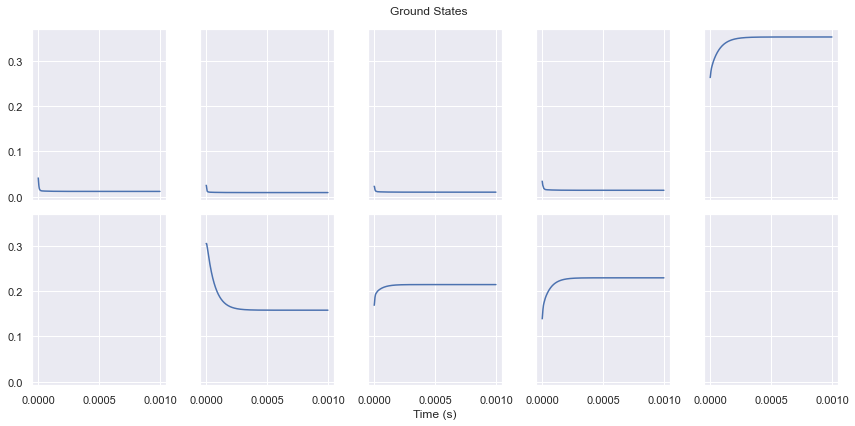

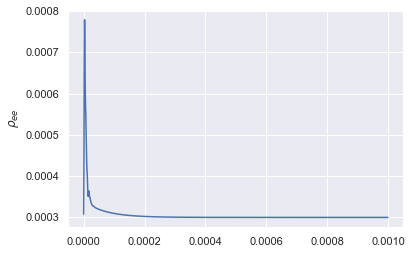

In [9]:
times = np.linspace(0, 1e-3, 1001)
res_both_decay_1 = mesolve(ham_mw + ham_laser,
                         tlist=times,
                         rho0=rho_ss_laser,
                         options=Options(nsteps=2**6 * 1000),
                         c_ops=decays,
                         progress_bar=True)
qsave(res_both_decay_1, "res_both_decay_1")
plot_excited_states_time(res_both_decay_1)
plot_ground_states_time(res_both_decay_1)
rho_ee_t = [sum(state.diag()[8:]) for state in res_both_decay_1.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")

In [13]:
# res_both_decay = qload("res_both_decay")


In [14]:
sum(res_both_decay.states[-1].diag()[8:])

0.00029940379567745974

In [15]:
sum(rho_ss_laser.diag()[8:])

0.0003071903365523568

In [16]:
sum(res_both_decay.states[-1].diag()[8:]) - sum(rho_ss_laser.diag()[8:])

-7.786540874897031e-06

### MW resonant to transition 3 (double transition)

10.1%. Run time: 148.35s. Est. time left: 00:00:22:01
20.1%. Run time: 290.57s. Est. time left: 00:00:19:16
30.1%. Run time: 436.40s. Est. time left: 00:00:16:54
40.1%. Run time: 584.45s. Est. time left: 00:00:14:34
50.0%. Run time: 726.39s. Est. time left: 00:00:12:04
60.0%. Run time: 867.04s. Est. time left: 00:00:09:37
70.0%. Run time: 1007.99s. Est. time left: 00:00:07:11
80.0%. Run time: 1148.85s. Est. time left: 00:00:04:46
90.0%. Run time: 1291.39s. Est. time left: 00:00:02:23
Total run time: 1429.86s


Text(0, 0.5, '$\\rho_{ee}$')

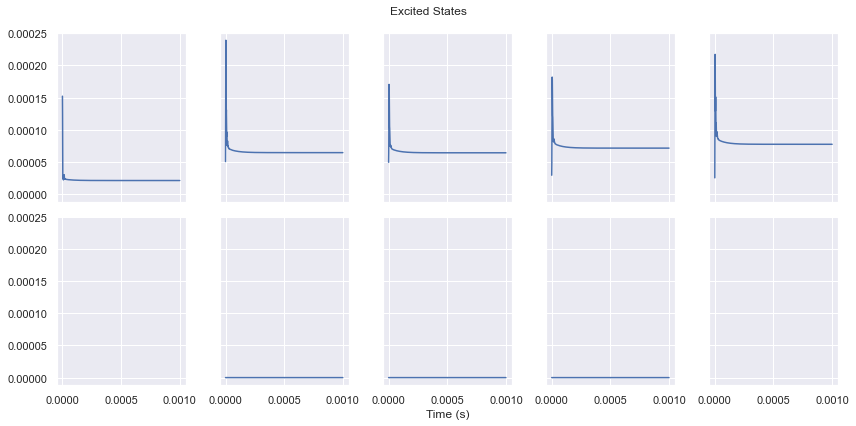

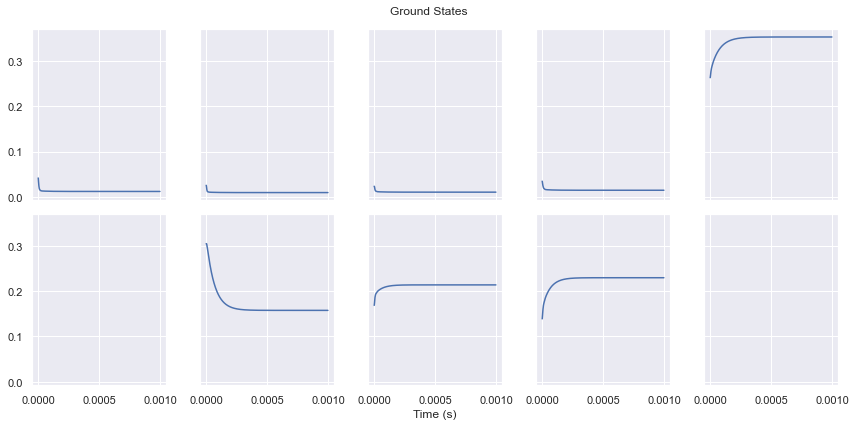

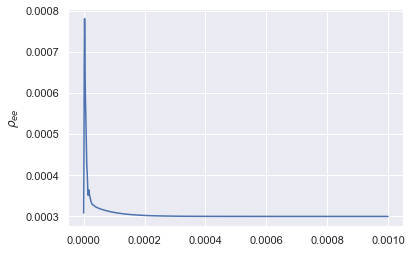

In [27]:
ham = ham_laser + H_mw(
    5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[2], b_static_z=b_longitudinal)
times = np.linspace(0, 1e-3, 1001)
res_both_decay_t3 = mesolve(ham,
                         tlist=times,
                         rho0=rho_ss_laser,
                         options=Options(nsteps=2**6 * 1000),
                         c_ops=decays,
                         progress_bar=True)
qsave(res_both_decay_t3, "res_both_decay_t3")
plot_excited_states_time(res_both_decay_t3)
plot_ground_states_time(res_both_decay_t3)
# maplot(res_both_decay.states[-1])
# rho_ss_both = steadystate(ham, c_op_list=decays)
# maplot(rho_ss_both)
rho_ee_t = [sum(state.diag()[8:]) for state in res_both_decay_t3.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")

In [17]:
# res_both_decay_t3 = qload("res_both_decay_t3")


In [18]:
sum(res_both_decay_t3.states[-1].diag()[8:])

0.00029903260766423693

In [20]:
sum(rho_ss_laser.diag()[8:])

0.0003071903365523568

In [22]:
sum(res_both_decay_t3.states[-1].diag()[8:]) - sum(rho_ss_laser.diag()[8:])

-8.157728888119847e-06

In [24]:
sum(res_both_decay_t3.states[-1].diag()[:8]) - sum(rho_ss_laser.diag()[:8])

8.157728702218314e-06

### mw resonant to pi transition 

There should be no resonance since $B_{mw} \bf{e}_z = 0 $.

10.1%. Run time:   7.49s. Est. time left: 00:00:01:06
20.1%. Run time:  14.78s. Est. time left: 00:00:00:58
30.1%. Run time:  22.16s. Est. time left: 00:00:00:51
40.1%. Run time:  29.46s. Est. time left: 00:00:00:44
50.0%. Run time:  36.77s. Est. time left: 00:00:00:36
60.0%. Run time:  43.97s. Est. time left: 00:00:00:29
70.0%. Run time:  51.24s. Est. time left: 00:00:00:21
80.0%. Run time:  58.46s. Est. time left: 00:00:00:14
90.0%. Run time:  65.77s. Est. time left: 00:00:00:07
Total run time:  73.08s


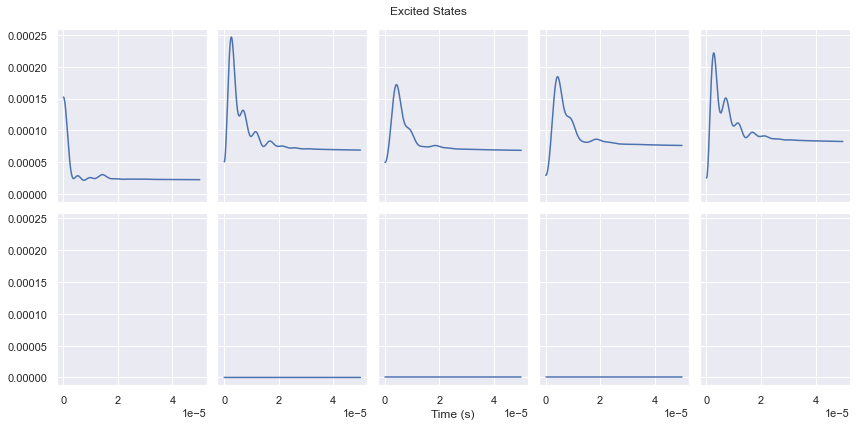

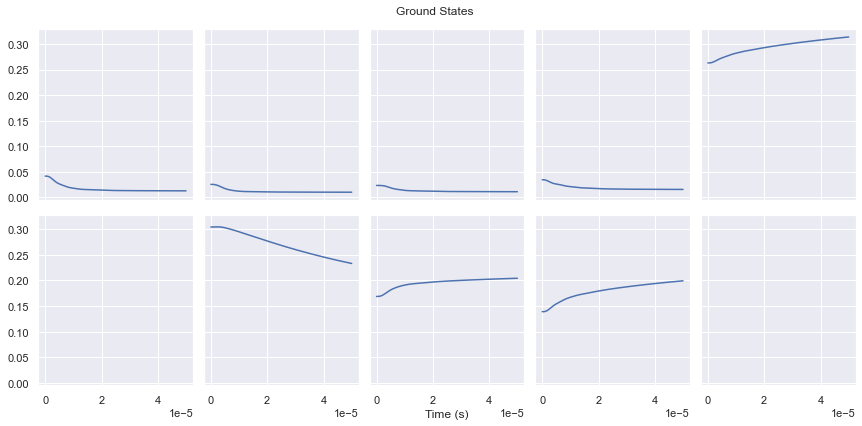

In [32]:
ham = ham_laser + H_mw(
    5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[1], b_static_z=b_longitudinal)
res_both_decay_pi = mesolve(ham,
                        tlist=np.linspace(0, 5e-5, 1001),
                        rho0=rho_ss_laser,
                        options=Options(nsteps=2**2 * 1000),
                        c_ops=decays,
                        progress_bar=True)
qsave(res_both_decay_pi, "res_both_decay_pi")
plot_excited_states_time(res_both_decay_pi)
plot_ground_states_time(res_both_decay_pi)
# maplot(res_both_decay_pi.states[-1])
rho_ss_both = steadystate(ham, c_op_list=decays)
# maplot(rho_ss_both)
rho_ee_t = [sum(state.diag()[8:]) for state in res_both_decay_pi.states]

Text(0, 0.5, '$\\rho_{ee}$')

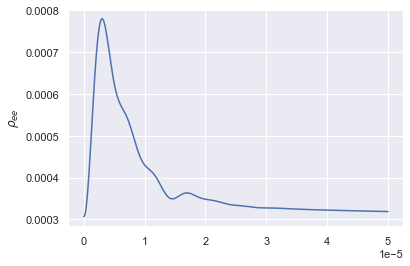

In [33]:
plt.figure()
plt.plot(np.linspace(0, 5e-5, 1001), rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")

In [34]:
sum(res_both_decay_pi.states[-1].diag()[8:])

0.0003188428468969306

In [35]:
sum(rho_ss_laser.diag()[8:])

0.0003071903365523568

In [36]:
sum(res_both_decay_pi.states[-1].diag()[8:]) - sum(rho_ss_laser.diag()[8:])

1.16525103445738e-05

### Clock Transition

Should be off-resonant, like all $\pi$ transitions

10.1%. Run time: 136.45s. Est. time left: 00:00:20:15
20.1%. Run time: 272.01s. Est. time left: 00:00:18:02
30.1%. Run time: 407.79s. Est. time left: 00:00:15:48
40.1%. Run time: 543.04s. Est. time left: 00:00:13:32
50.0%. Run time: 678.17s. Est. time left: 00:00:11:16
60.0%. Run time: 815.29s. Est. time left: 00:00:09:02
70.0%. Run time: 951.03s. Est. time left: 00:00:06:47
80.0%. Run time: 1086.19s. Est. time left: 00:00:04:31
90.0%. Run time: 1221.04s. Est. time left: 00:00:02:15
Total run time: 1354.87s


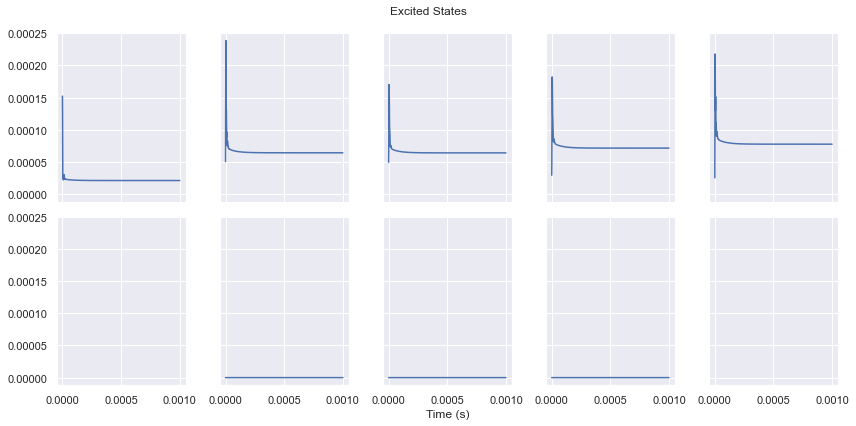

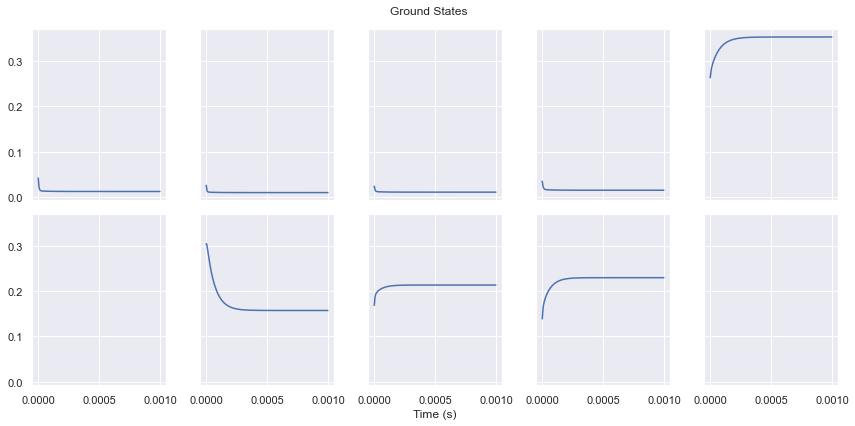

In [5]:
ham = (ham_laser + H_mw(5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[3], b_static_z=b_longitudinal))
times = np.linspace(0, 1e-3, 1001)
res_both_decay_clock = mesolve(ham,
                         tlist=times,
                         rho0=rho_ss_laser,
                         options=Options(nsteps=2**6 * 1000),
                         c_ops=decays,
                         progress_bar=True)
plot_excited_states_time(res_both_decay_clock)
plot_ground_states_time(res_both_decay_clock)
qsave(res_both_decay_clock, "res_both_decay_clock")
# maplot(res_both_decay_clock.states[-1])
rho_ss_both = steadystate(ham, c_op_list=decays)
# maplot(rho_ss_both)


Text(0, 0.5, '$\\rho_{ee}$')

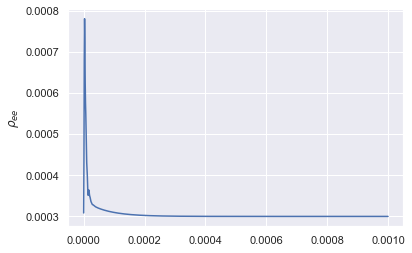

In [6]:
rho_ee_t = [sum(state.diag()[8:]) for state in res_both_decay_clock.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")

In [7]:
sum(rho_ss_laser.diag()[8:])

0.0003071903365523568

In [8]:
sum(res_both_decay_clock.states[-1].diag()[8:])

0.0002988170792635193

In [9]:
sum(rho_ss_laser.diag()[8:])-sum(res_both_decay_clock.states[-1].diag()[8:])

8.373257288837475e-06

### Comparison $\rho_{ee}$

In [4]:
# res_both_decay_clock = qload("res_both_decay_clock")
# res_both_decay_pi = qload("res_both_decay_pi")
# res_both_decay_t3 = qload("res_both_decay_t3")
# res_mw_decay_1 = qload("res_mw_decay_1")

Text(0, 0.5, '$\\rho_{ee}$')

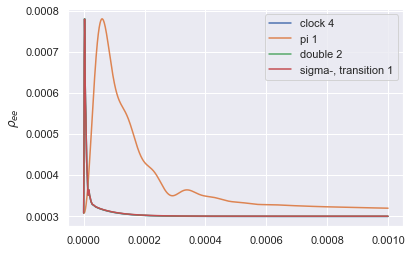

In [13]:
times = np.linspace(0, 1e-3, 1001)

plt.figure()
plt.plot(times, [sum(state.diag()[8:]) for state in res_both_decay_clock.states], label="clock 4")
plt.plot(times,[sum(state.diag()[8:]) for state in res_both_decay_pi.states], label="pi 1")
plt.plot(times, [sum(state.diag()[8:]) for state in res_both_decay_t3.states], label="double 2")
plt.plot(times, [sum(state.diag()[8:]) for state in res_both_decay_1.states], label="sigma-, transition 1")
plt.legend()
plt.ylabel(r"$\rho_{ee}$")

Text(0, 0.5, '$\\rho_{ee}$')

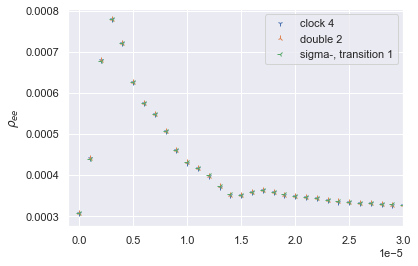

In [17]:
plt.figure()
plt.plot(times, [sum(state.diag()[8:]) for state in res_both_decay_clock.states], "1", label="clock 4")
# plt.plot(times,[sum(state.diag()[8:]) for state in res_both_decay_pi.states], label="pi 1")
plt.plot(times, [sum(state.diag()[8:]) for state in res_both_decay_t3.states], "2", label="double 2")
plt.plot(times, [sum(state.diag()[8:]) for state in res_both_decay_1.states], "3", label="sigma-, transition 1")
plt.xlim(-1e-6, 3e-5)
plt.legend()
plt.ylabel(r"$\rho_{ee}$")

10.1%. Run time:  73.63s. Est. time left: 00:00:10:56
20.1%. Run time: 145.62s. Est. time left: 00:00:09:39
30.1%. Run time: 218.14s. Est. time left: 00:00:08:27
40.1%. Run time: 289.64s. Est. time left: 00:00:07:13
50.0%. Run time: 365.05s. Est. time left: 00:00:06:04
60.0%. Run time: 439.46s. Est. time left: 00:00:04:52
70.0%. Run time: 510.81s. Est. time left: 00:00:03:38
80.0%. Run time: 582.11s. Est. time left: 00:00:02:25
90.0%. Run time: 655.32s. Est. time left: 00:00:01:12
Total run time: 727.68s


Text(0, 0.5, '$\\rho_{ee}$')

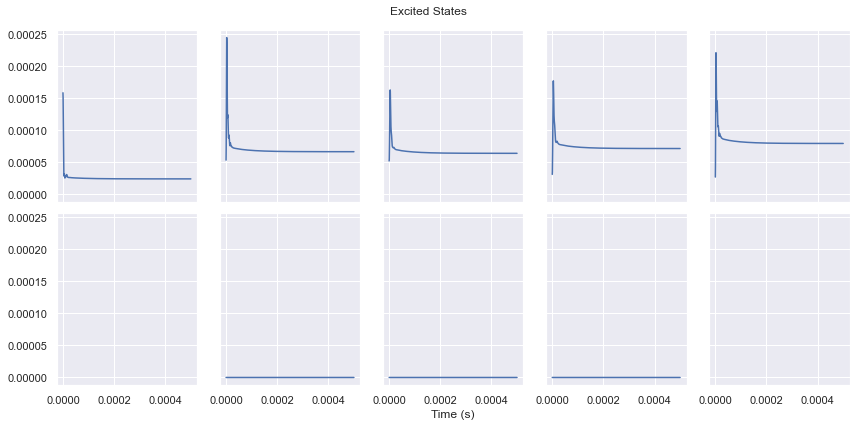

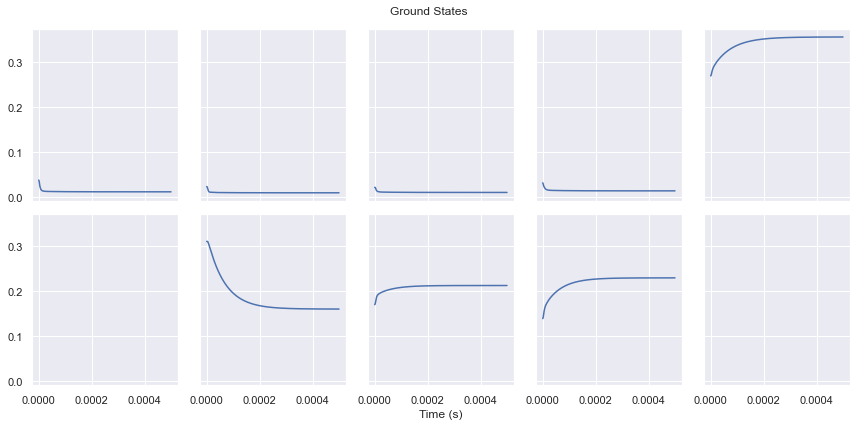

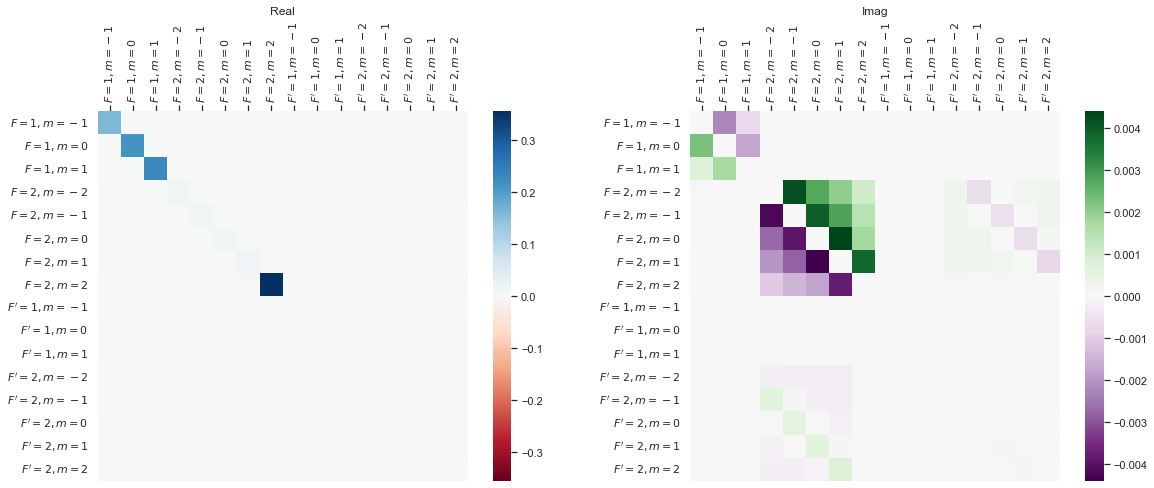

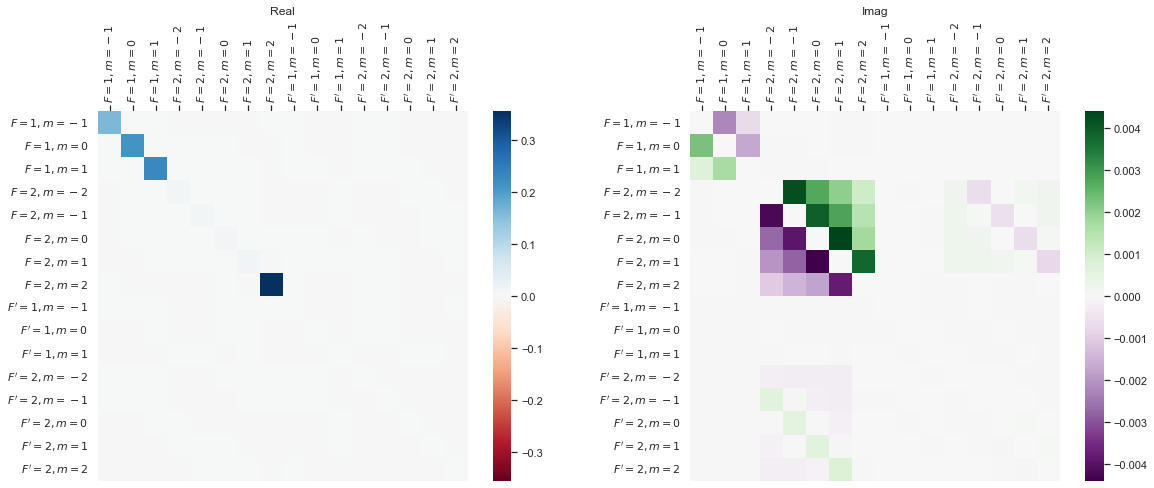

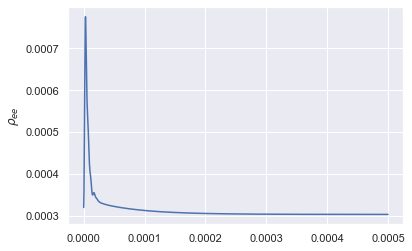

In [40]:
ham = (laser_sigma_plus_F2_FP2_D1(get_pump_intensity(10e-6)) 
    + H_mw(5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[3], b_static_z=b_longitudinal))
times = np.linspace(0, 5e-4, 1001)
res_both_decay_clock = mesolve(ham,
                         tlist=times,
                         rho0=rho_ss_laser,
                         options=Options(nsteps=2**5 * 1000),
                         c_ops=decays,
                         progress_bar=True)
plot_excited_states_time(res_both_decay_clock)
plot_ground_states_time(res_both_decay_clock)
maplot(res_both_decay_clock.states[-1])
rho_ss_both = steadystate(ham, c_op_list=decays)
maplot(rho_ss_both)
rho_ee_t = [sum(state.diag()[8:]) for state in res_both_decay_clock.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")

In [42]:
(rho_ss_both-rho_ss_laser).diag()

array([-1.50641980e-01,  4.25147758e-02,  9.05163054e-02, -2.60519090e-02,
       -1.39330158e-02, -1.12897455e-02, -1.76505505e-02,  8.65526690e-02,
       -3.04424661e-09, -2.54290620e-11, -6.51111114e-11, -1.34333222e-04,
        1.31543938e-05,  1.19157793e-05,  4.03305019e-05,  5.23861522e-05])

In [43]:
sum((rho_ss_both-rho_ss_laser).diag()[8:])

-1.6549530025474465e-05

In [44]:
sum((rho_ss_both-rho_ss_laser).diag()[:8])

1.6549530024778658e-05

(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

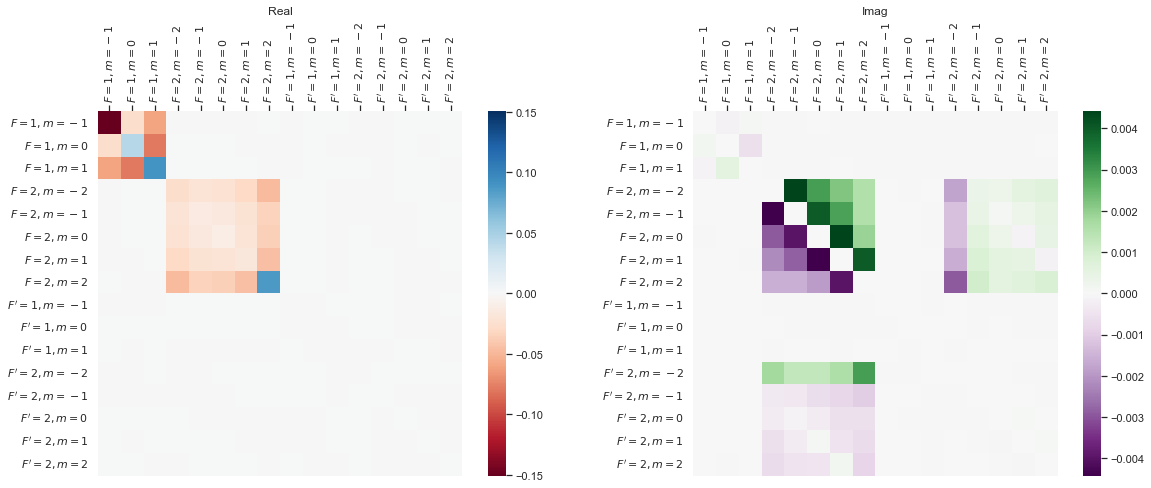

In [45]:
maplot(rho_ss_both-rho_ss_laser)

In [47]:
H_mw(5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[3], b_static_z=b_longitudinal).eigenenergies()

array([-8.79157469e+05, -4.41337215e+05, -4.39596294e+05, -4.75037011e-03,
       -2.02806168e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.39587265e+05,  4.41346250e+05,  8.79121333e+05])

In [48]:
resonant_mw_freqs[3]

0.0

In [50]:
eigens, eigvecs = H_mw(5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[3], b_static_z=b_longitudinal).eigenstates()

10.1%. Run time:   7.47s. Est. time left: 00:00:01:06
20.1%. Run time:  16.01s. Est. time left: 00:00:01:03
30.1%. Run time:  24.94s. Est. time left: 00:00:00:58
40.1%. Run time:  33.33s. Est. time left: 00:00:00:49
50.0%. Run time:  41.20s. Est. time left: 00:00:00:41
60.0%. Run time:  48.96s. Est. time left: 00:00:00:32
70.0%. Run time:  56.16s. Est. time left: 00:00:00:24
80.0%. Run time:  63.60s. Est. time left: 00:00:00:15
90.0%. Run time:  70.72s. Est. time left: 00:00:00:07
Total run time:  78.56s


Text(0, 0.5, '$\\rho_{ee}$')

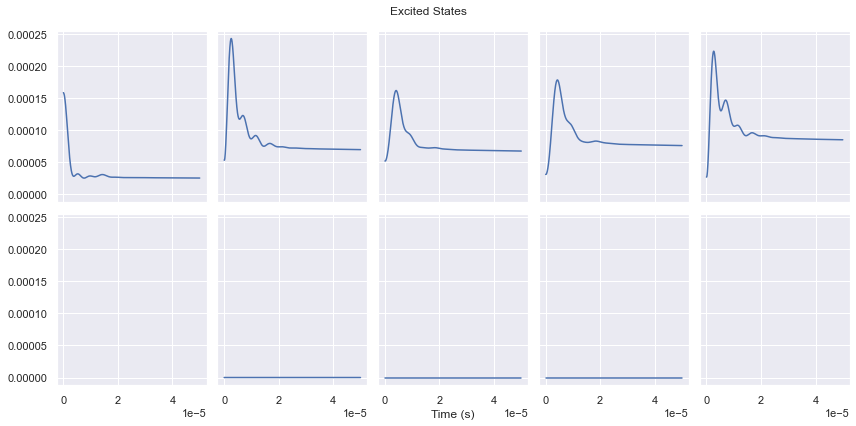

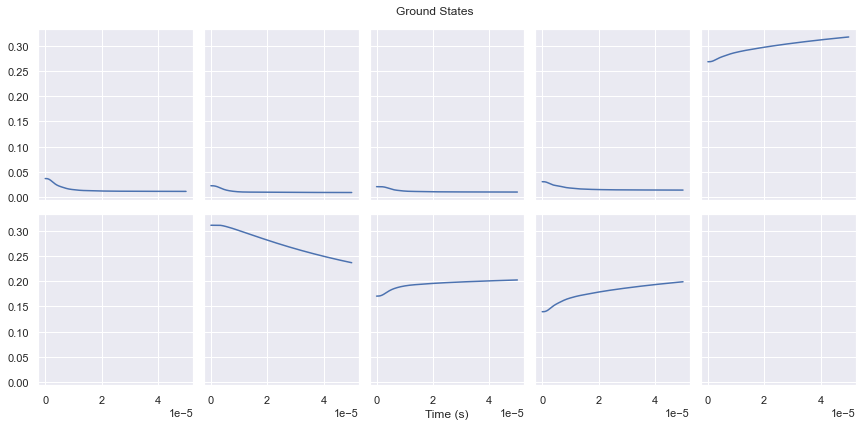

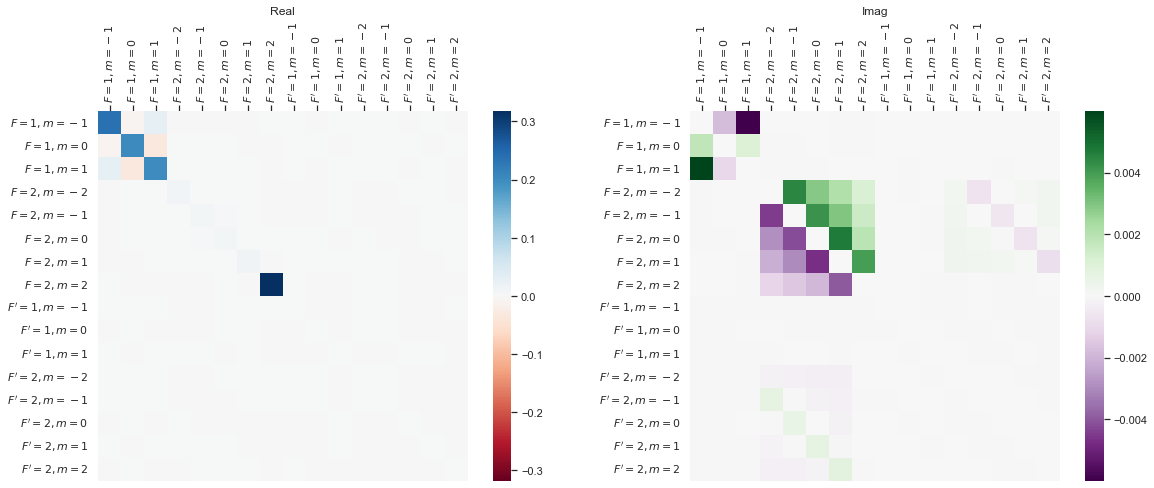

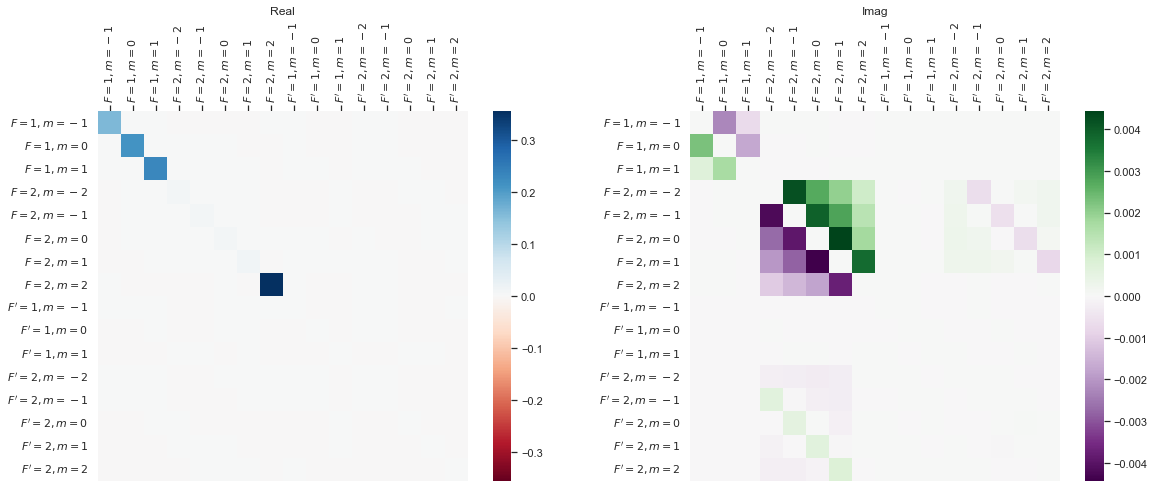

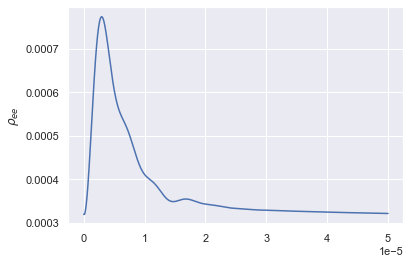

In [60]:
ham = (laser_sigma_plus_F2_FP2_D1(get_pump_intensity(10e-6)) 
    + H_mw(5e-4, 5e-4, 0, det_mw=resonant_mw_freqs[-1], b_static_z=b_longitudinal))
times = np.linspace(0, 5e-5, 1001)
res_both_decay_last = mesolve(ham,
                         tlist=times,
                         rho0=rho_ss_laser,
                         options=Options(nsteps=2**3 * 1000),
                         c_ops=decays,
                         progress_bar=True)
plot_excited_states_time(res_both_decay_last)
plot_ground_states_time(res_both_decay_last)
maplot(res_both_decay_last.states[-1])
rho_ss_both = steadystate(ham, c_op_list=decays)
maplot(rho_ss_both)
rho_ee_t = [sum(state.diag()[8:]) for state in res_both_decay_last.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")

In [61]:
Qobj(sum(decays).full()[:8,:8])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.         54.77225575 54.77225575 54.77225575
  54.77225575 54.77225575]
 [ 0.          0.          0.         54.77225575 54.77225575 54.77225575
  54.77225575 54.77225575]
 [ 0.          0.          0.         54.77225575 54.77225575 54.77225575
  54.77225575 54.77225575]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]]

In [62]:
b_longitudinal = 0.1
resonant_mw_freqs = [b_longitudinal * 0.7e6 * 2 * pi * k for k in range(-3, 3+1)]
mw_freq = resonant_mw_freqs[0]
decays = (natural_decay_ops_D1() + quenching_ops("D1") +
          F2_to_F1_ground_state_decay("D1", gamma=3000) +
          F1_to_F2_ground_state_decay("D1", gamma=3000) +
          dephasing_excited_states("D1"))

In [63]:
Qobj(sum(decays).full()[:8,:8])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.         54.77225575 54.77225575 54.77225575
  54.77225575 54.77225575]
 [ 0.          0.          0.         54.77225575 54.77225575 54.77225575
  54.77225575 54.77225575]
 [ 0.          0.          0.         54.77225575 54.77225575 54.77225575
  54.77225575 54.77225575]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]
 [54.77225575 54.77225575 54.77225575  0.          0.          0.
   0.          0.        ]]

In [64]:
dephasing_excited_states("D1")

[Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
 Qobj data =
 [[   0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.        ]
  [   0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.        ]
  [   0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.        ]
  [   0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.            0.            0.            0.            0.
      0.        ]
  [   0.            0.            0.            0.  

In [65]:
dephasing_excited_states("D1")[0]

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0

In [66]:
Qobj(sum(decays).full()[8:,8:])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[3162.27766017    0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.         3162.27766017    0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.         3162.27766017    0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.         3162.27766017    0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.         3162.27766017
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
  3162.27766017    0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.         3162.27766017    0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.         3162.27766017]]

In [67]:
b_longitudinal = 0.1
resonant_mw_freqs = [b_longitudinal * 0.7e6 * 2 * pi * k for k in range(-3, 3+1)]
mw_freq = resonant_mw_freqs[0]
decays = (natural_decay_ops_D1() + quenching_ops("D1") +
          F2_to_F1_ground_state_decay("D1", gamma=3000) +
          F1_to_F2_ground_state_decay("D1", gamma=3000) +
          dephasing_excited_states("D1"))

In [68]:
Qobj(sum(decays).full()[8:,8:])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[3162.27766017    0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.         3162.27766017    0.            0.            0.
     0.            0.            0.        ]
 [   0.            0.         3162.27766017    0.            0.
     0.            0.            0.        ]
 [   0.            0.            0.         3162.27766017    0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.         3162.27766017
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
  3162.27766017    0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.         3162.27766017    0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.         3162.27766017]]

In [70]:
sum(decays)

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = False
Qobj data =
[[    0.             0.             0.            54.77225575
     54.77225575    54.77225575    54.77225575    54.77225575
  10900.28624337  7430.01653645  9165.15138991  4914.95636402
  12170.49311409  7430.01653645  9165.15138991  9165.15138991]
 [    0.             0.             0.            54.77225575
     54.77225575    54.77225575    54.77225575    54.77225575
  10900.28624337  9165.15138991  7430.01653645  9165.15138991
   6159.80966574 12635.42109683  6159.80966574  9165.15138991]
 [    0.             0.             0.            54.77225575
     54.77225575    54.77225575    54.77225575    54.77225575
   9165.15138991 10900.28624337  7430.01653645  9165.15138991
   9165.15138991  7430.01653645 12170.49311409  4914.95636402]
 [   54.77225575    54.77225575    54.77225575     0.
      0.             0.             0.             0.
  13415.34641581  9165.15138991  9165.15138991  56

In [71]:
Qobj(sum(decays).full()[8:,:])

Quantum object: dims = [[8], [16]], shape = (8, 16), type = oper, isherm = False
Qobj data =
[[   0.            0.            0.            0.            0.
     0.            0.            0.         3162.27766017    0.
     0.            0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.         3162.27766017
     0.            0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
  3162.27766017    0.            0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.         3162.27766017    0.            0.            0.
     0.        ]
 [   0.            0.            0.            0.            0.

In [72]:
Qobj(sum(decays).full()[8:,:8])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [73]:
Qobj(sum(decays).full()[:8,8:])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[10900.28624337  7430.01653645  9165.15138991  4914.95636402
  12170.49311409  7430.01653645  9165.15138991  9165.15138991]
 [10900.28624337  9165.15138991  7430.01653645  9165.15138991
   6159.80966574 12635.42109683  6159.80966574  9165.15138991]
 [ 9165.15138991 10900.28624337  7430.01653645  9165.15138991
   9165.15138991  7430.01653645 12170.49311409  4914.95636402]
 [13415.34641581  9165.15138991  9165.15138991  5694.88168299
  11619.00263222  9165.15138991  9165.15138991  9165.15138991]
 [12170.49311409 12170.49311409  9165.15138991  6711.3001476
   7430.01653645 12170.49311409  9165.15138991  9165.15138991]
 [10900.28624337 12635.42109683 10900.28624337  9165.15138991
   6159.80966574  9165.15138991 12170.49311409  9165.15138991]
 [ 9165.15138991 12170.49311409 12170.49311409  9165.15138991
   9165.15138991  6159.80966574 10900.28624337 11619.00263222]
 [ 9165.15138991  9165.15138991 134